In [1]:
import numpy as np

In [2]:
print("Hello world")

Hello world


## Importing dataset from kaggle

In [3]:
from google.colab import files
files.upload()   # upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mukeshsunku","key":"0ba85e306b541aa18a7549b3a596f382"}'}

In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle datasets download -d mlg-ulb/creditcardfraud


Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
  0% 0.00/66.0M [00:00<?, ?B/s]
100% 66.0M/66.0M [00:00<00:00, 1.12GB/s]


In [6]:
!unzip creditcardfraud.zip


Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


### Importing libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

## Data preprocessing

In [8]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [9]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
df.size

8829017

In [12]:
df.shape

(284807, 31)

In [13]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [14]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Class distribution (Imbalance Check)

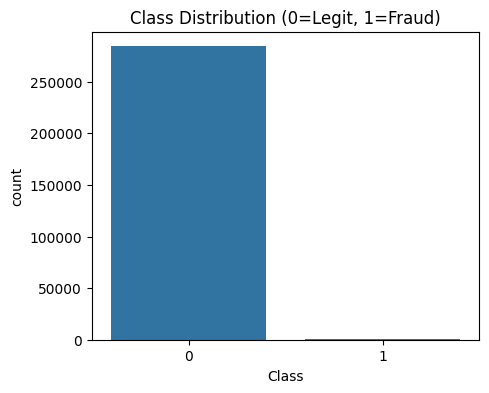

Fraudulent transactions: 0.1727%


In [16]:
# Class distribution
plt.figure(figsize=(5,4))
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0=Legit, 1=Fraud)")
plt.show()

fraud_pct = df['Class'].mean() * 100
print(f"Fraudulent transactions: {fraud_pct:.4f}%")

### Feature Distributions

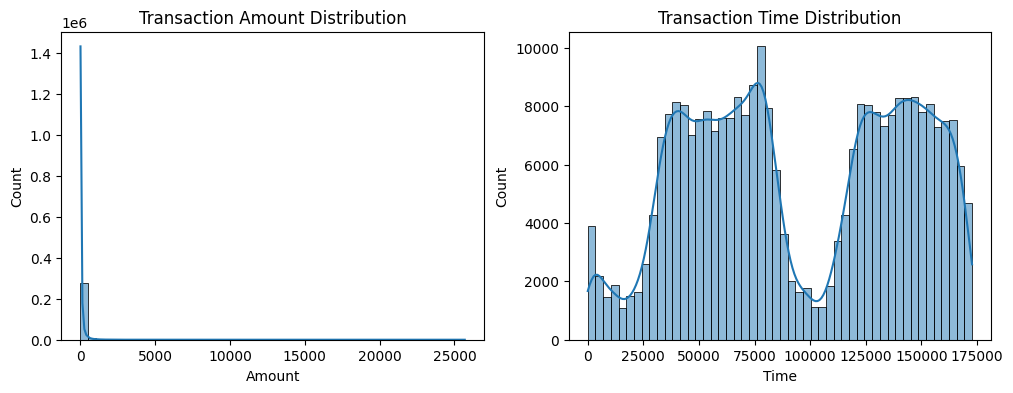

In [17]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")

plt.subplot(1,2,2)
sns.histplot(df['Time'], bins=50, kde=True)
plt.title("Transaction Time Distribution")
plt.show()

### Correlation Heatmap

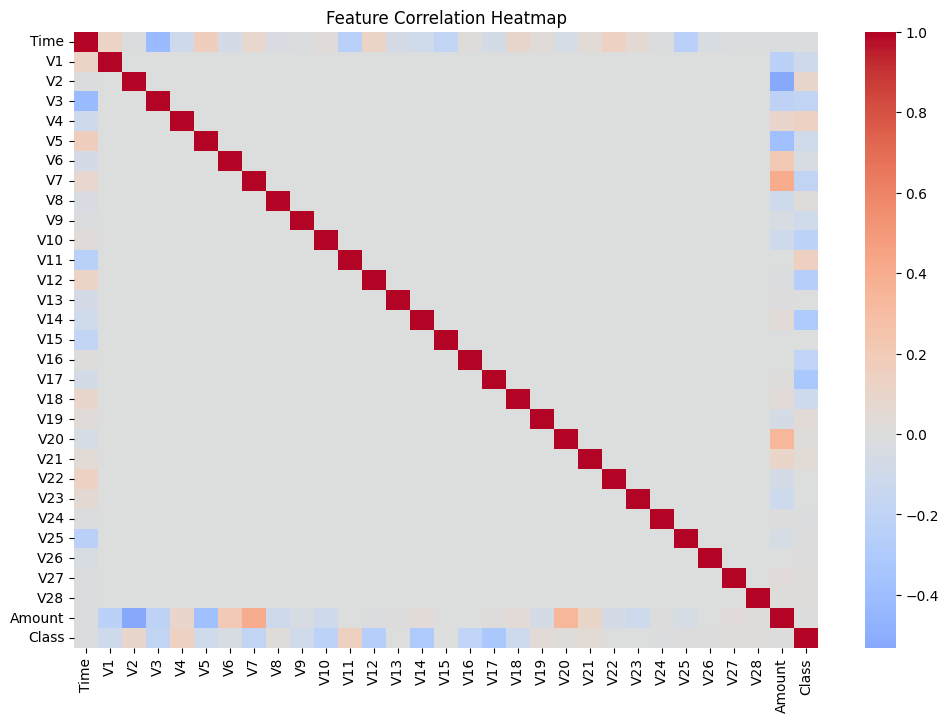

Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64


In [18]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

print(corr['Class'].sort_values(ascending=False).head(10))


### Splitting data (for training)

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (227845, 30) Test shape: (56962, 30)


In [20]:
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



amt_time_cols = ['Amount', 'Time']

preprocess = ColumnTransformer([
    ('scale_amt_time', StandardScaler(), amt_time_cols)
], remainder='passthrough')


## Isolation Forest

In [21]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

# Model
iso = IsolationForest(contamination=0.002, random_state=42)  # contamination ≈ fraud ratio
y_pred_iso = iso.fit_predict(X)

# Convert predictions: -1 → 1 (fraud), 1 → 0 (legit)
y_pred_iso = [1 if p == -1 else 0 for p in y_pred_iso]

print("Confusion Matrix (Isolation Forest):")
print(confusion_matrix(y, y_pred_iso))
print("\nClassification Report:")
print(classification_report(y, y_pred_iso))


Confusion Matrix (Isolation Forest):
[[283883    432]
 [   354    138]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.24      0.28      0.26       492

    accuracy                           1.00    284807
   macro avg       0.62      0.64      0.63    284807
weighted avg       1.00      1.00      1.00    284807



In [22]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import roc_auc_score, average_precision_score

# Isolation Forest
iso = Pipeline([
    ('prep', preprocess),
    ('iso', IsolationForest(n_estimators=300, contamination=y_train.mean(), random_state=42))
])
iso.fit(X_train)
iso_scores = -iso.named_steps['iso'].score_samples(iso.named_steps['prep'].transform(X_test))

print("IsolationForest ROC-AUC:", roc_auc_score(y_test, iso_scores))
print("IsolationForest PR-AUC:", average_precision_score(y_test, iso_scores))


IsolationForest ROC-AUC: 0.9535876147026058
IsolationForest PR-AUC: 0.14026249016965553


## Lof (Local Outlier Factor)

In [23]:
# from sklearn.neighbors import LocalOutlierFactor

# lof = LocalOutlierFactor(n_neighbors=20, contamination=0.002)
# y_pred_lof = lof.fit_predict(X)

# # Convert predictions: -1 → 1 (fraud), 1 → 0 (legit)
# y_pred_lof = [1 if p == -1 else 0 for p in y_pred_lof]

# print("Confusion Matrix (LOF):")
# print(confusion_matrix(y, y_pred_lof))
# print("\nClassification Report:")
# print(classification_report(y, y_pred_lof))


### Running lof on sample data

In [24]:
# X_sample = X.sample(n=20000, random_state=42)
# y_sample = y.loc[X_sample.index]

# lof = LocalOutlierFactor(n_neighbors=20, contamination=0.002)
# y_pred_lof = lof.fit_predict(X_sample)

# y_pred_lof = [1 if p == -1 else 0 for p in y_pred_lof]
# print(confusion_matrix(y_sample, y_pred_lof))
# print(classification_report(y_sample, y_pred_lof))


## Training XG Boost classifier

              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9998     56864
           1     0.8737    0.8469    0.8601        98

    accuracy                         0.9995     56962
   macro avg     0.9367    0.9234    0.9299     56962
weighted avg     0.9995    0.9995    0.9995     56962

Confusion Matrix:
 [[56852    12]
 [   15    83]]


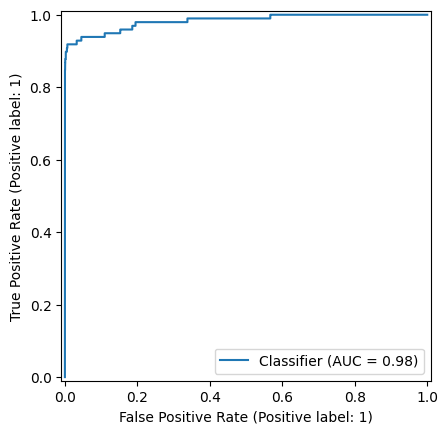

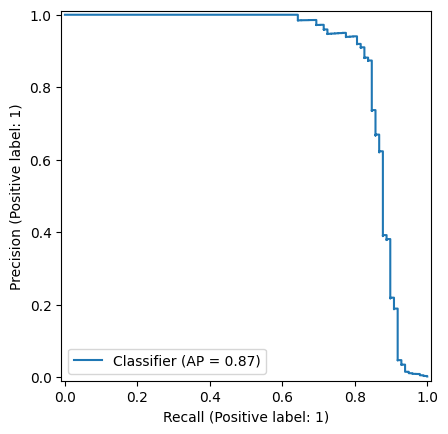

In [25]:
from xgboost import XGBClassifier
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos

xgb = Pipeline([
    ('prep', preprocess),
    ('clf', XGBClassifier(
        n_estimators=600,
        max_depth=4,
        learning_rate=0.05,
        subsample=0.9,
        colsample_bytree=0.9,
        scale_pos_weight=scale_pos_weight,
        eval_metric='aucpr',
        random_state=42,
        tree_method='hist'
    ))
])

xgb.fit(X_train, y_train)
proba = xgb.predict_proba(X_test)[:,1]
preds = (proba >= 0.5).astype(int)

print(classification_report(y_test, preds, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))

# ROC & PR Curves
RocCurveDisplay.from_predictions(y_test, proba)
plt.show()
PrecisionRecallDisplay.from_predictions(y_test, proba)
plt.show()


In [28]:
y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)[:,1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))


Confusion Matrix:
[[56852    12]
 [   15    83]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962


ROC AUC Score: 0.9831904694911167


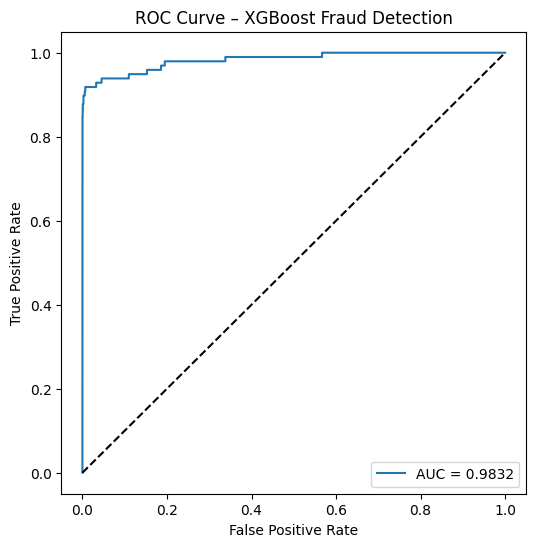

In [33]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_proba):.4f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – XGBoost Fraud Detection")
plt.legend()
plt.show()


### Saving model for streamlit use

In [34]:
import joblib

joblib.dump(xgb, "xgb_model.pkl")
files.download("xgb_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Probabilities from your trained pipeline
y_proba = xgb.predict_proba(X_test)[:, 1]

# Try different thresholds
for thresh in [0.5, 0.4, 0.3, 0.2]:
    print(f"\nThreshold = {thresh}")
    y_pred_thresh = (y_proba >= thresh).astype(int)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_thresh)
    print("Confusion Matrix:")
    print(cm)

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred_thresh, digits=4))

    # ROC AUC (this doesn’t depend on threshold)
    print("ROC AUC Score:", roc_auc_score(y_test, y_proba))



Threshold = 0.5
Confusion Matrix:
[[56852    12]
 [   15    83]]
Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9998     56864
           1     0.8737    0.8469    0.8601        98

    accuracy                         0.9995     56962
   macro avg     0.9367    0.9234    0.9299     56962
weighted avg     0.9995    0.9995    0.9995     56962

ROC AUC Score: 0.9831904694911167

Threshold = 0.4
Confusion Matrix:
[[56849    15]
 [   15    83]]
Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     56864
           1     0.8469    0.8469    0.8469        98

    accuracy                         0.9995     56962
   macro avg     0.9233    0.9233    0.9233     56962
weighted avg     0.9995    0.9995    0.9995     56962

ROC AUC Score: 0.9831904694911167

Threshold = 0.3
Confusion Matrix:
[[56836    28]
 [   15    83]]
Classification Report:
           

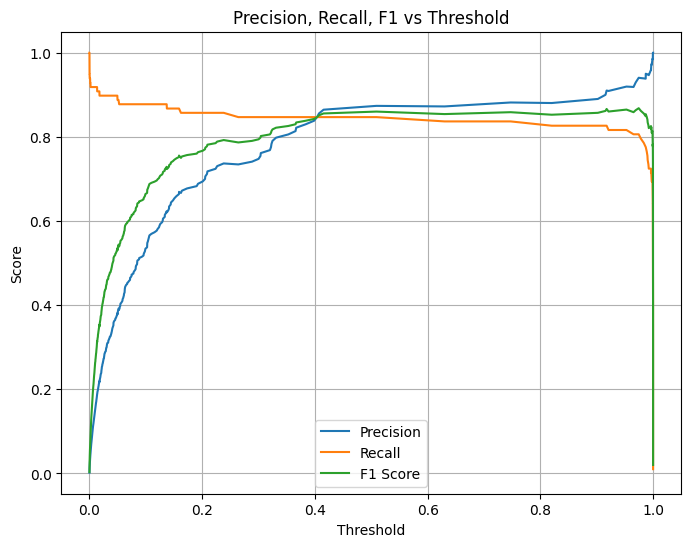

In [37]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.plot(thresholds, 2*(precisions[:-1]*recalls[:-1])/(precisions[:-1]+recalls[:-1]), label="F1 Score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, F1 vs Threshold")
plt.legend()
plt.grid()
plt.show()


## Anomaly Detection (Unsupervised Methods)

In [38]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Isolation Forest
iso = IsolationForest(contamination=0.001, random_state=42)
y_pred_iso = iso.fit_predict(X_train)
y_pred_iso = [1 if x == -1 else 0 for x in y_pred_iso]

# Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.001)
y_pred_lof = lof.fit_predict(X_train)
y_pred_lof = [1 if x == -1 else 0 for x in y_pred_lof]


In [39]:
X_sample = X_train.sample(20000, random_state=42)

iso = IsolationForest(
    contamination=0.001,
    n_estimators=50,
    max_samples=10000,
    random_state=42,
    n_jobs=-1
)


lof = LocalOutlierFactor(
    n_neighbors=20,
    contamination=0.001,
    n_jobs=-1
)
y_pred_lof = lof.fit_predict(X_sample)




In [41]:
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate Isolation Forest
print("Isolation Forest Results:")
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_iso))
print("\nClassification Report:\n", classification_report(y_train, y_pred_iso, digits=4))

# Evaluate LOF
print("\nLocal Outlier Factor Results:")
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_lof))
print("\nClassification Report:\n", classification_report(y_train, y_pred_lof, digits=4))


Isolation Forest Results:
Confusion Matrix:
 [[227315    136]
 [   302     92]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9987    0.9994    0.9990    227451
           1     0.4035    0.2335    0.2958       394

    accuracy                         0.9981    227845
   macro avg     0.7011    0.6165    0.6474    227845
weighted avg     0.9976    0.9981    0.9978    227845


Local Outlier Factor Results:


ValueError: Found input variables with inconsistent numbers of samples: [227845, 20000]

In [42]:
# y_train_sample corresponds to the same sample you used for LOF
y_train_sample = y_train.sample(20000, random_state=42)

print("Local Outlier Factor Results:")
print("Confusion Matrix:\n", confusion_matrix(y_train_sample, y_pred_lof))
print("\nClassification Report:\n", classification_report(y_train_sample, y_pred_lof, digits=4))


Local Outlier Factor Results:
Confusion Matrix:
 [[    0     0     0]
 [   20     0 19951]
 [    0     0    29]]

Classification Report:
               precision    recall  f1-score   support

          -1     0.0000    0.0000    0.0000         0
           0     0.0000    0.0000    0.0000     19971
           1     0.0015    1.0000    0.0029        29

    accuracy                         0.0014     20000
   macro avg     0.0005    0.3333    0.0010     20000
weighted avg     0.0000    0.0014    0.0000     20000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [44]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# Convert Isolation Forest and LOF predictions: -1 -> 1 (fraud), 1 -> 0 (normal)
y_pred_iso_bin = [1 if x == -1 else 0 for x in y_pred_iso]
y_pred_lof_bin = [1 if x == -1 else 0 for x in y_pred_lof]

# Initialize dictionary
results = {"Model": [], "Precision (Fraud)": [], "Recall (Fraud)": [], "F1-Score (Fraud)": []}

# --- XGBoost (Supervised) ---
y_pred_xgb = (xgb.predict_proba(X_test)[:, 1] >= 0.5).astype(int)
results["Model"].append("XGBoost")
results["Precision (Fraud)"].append(precision_score(y_test, y_pred_xgb))
results["Recall (Fraud)"].append(recall_score(y_test, y_pred_xgb))
results["F1-Score (Fraud)"].append(f1_score(y_test, y_pred_xgb))

# --- Isolation Forest (Unsupervised) ---
results["Model"].append("Isolation Forest")
results["Precision (Fraud)"].append(precision_score(y_train, y_pred_iso_bin))
results["Recall (Fraud)"].append(recall_score(y_train, y_pred_iso_bin))
results["F1-Score (Fraud)"].append(f1_score(y_train, y_pred_iso_bin))

# --- Local Outlier Factor (Unsupervised, on sample) ---
# y_train_sample corresponds to the same 20k sample used for LOF
results["Model"].append("Local Outlier Factor (sample)")
results["Precision (Fraud)"].append(precision_score(y_train_sample, y_pred_lof_bin, zero_division=0))
results["Recall (Fraud)"].append(recall_score(y_train_sample, y_pred_lof_bin, zero_division=0))
results["F1-Score (Fraud)"].append(f1_score(y_train_sample, y_pred_lof_bin, zero_division=0))

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Precision (Fraud),Recall (Fraud),F1-Score (Fraud)
0,XGBoost,0.873684,0.846939,0.860104
1,Isolation Forest,0.000000,0.000000,0.000000
2,Local Outlier Factor (sample),0.000000,0.000000,0.000000


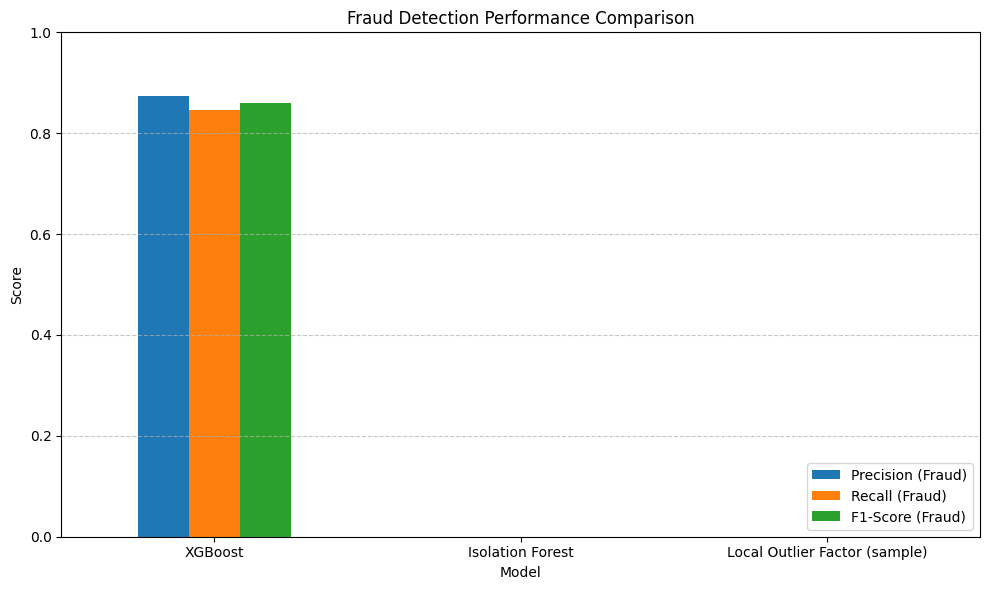

In [45]:
import matplotlib.pyplot as plt

# Set Model as index for easy plotting
results_plot = results_df.set_index("Model")

# Plot Precision, Recall, F1-Score
results_plot[["Precision (Fraud)", "Recall (Fraud)", "F1-Score (Fraud)"]].plot(
    kind="bar",
    figsize=(10,6),
    ylim=(0,1),
    rot=0
)

plt.title("Fraud Detection Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Model")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


## Building streamlit dashboard


In [46]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle

# Load trained model
with open('xgb_model.pkl', 'rb') as f:
    xgb = pickle.load(f)

st.title("Credit Card Fraud Detection")

st.write("""
Enter the transaction details below to check if it is likely to be fraudulent.
""")

# Create user inputs for the features
# Replace these with your actual feature names
amount = st.number_input("Transaction Amount", min_value=0.0, step=0.01)
v1 = st.number_input("V1")
v2 = st.number_input("V2")
v3 = st.number_input("V3")
# ... add all other features used in training

# Predict button
if st.button("Predict"):
    # Create DataFrame for model input
    input_data = pd.DataFrame([[amount, v1, v2, v3]], columns=['Amount','V1','V2','V3'])  # adjust column names
    prediction = xgb.predict(input_data)[0]
    proba = xgb.predict_proba(input_data)[0][1]

    if prediction == 1:
        st.error(f"⚠️ Fraudulent Transaction! Probability: {proba:.2f}")
    else:
        st.success(f"✅ Legitimate Transaction. Probability of Fraud: {proba:.2f}")


Writing app.py


In [47]:
import pickle

with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb, f)


In [49]:
!streamlit run app.py --server.port 8501 --server.address 0.0.0.0


/bin/bash: line 1: streamlit: command not found


In [51]:
!pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 121.1 MB/s eta 0:00:00


In [52]:
!pip install pyngrok


In [53]:
# from pyngrok import ngrok

# # Kill previous tunnels if any
# ngrok.kill()

# # Setup a tunnel to the streamlit port 8501
# public_url = ngrok.connect(port='8501')
# print(public_url)

# # Run Streamlit in the background
# !streamlit run app.py &>/dev/null&


ERROR:pyngrok.process.ngrok:t=2025-09-20T06:03:40+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-09-20T06:03:40+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-09-20T06:03:40+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.